In [54]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

<h3>Fetch 6 months of data from Yahoo</h3>

In [59]:
pd.set_option('display.width', 10000) # Prevent rollover to a new line
pd.set_option('display.max_columns', 0) # Show all columns

curr_date = dt.datetime.now()
goog = web.DataReader(
        'GOOG', 
        data_source='yahoo', 
        start=curr_date.replace(month=curr_date.month - 6),
        end=dt.datetime.strftime(curr_date, "%m/%d/%Y")
)
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-29,111.959999,109.809998,110.779999,110.339996,20386100.0,110.339996
2022-08-30,111.370003,108.800003,111.029999,109.910004,20548200.0,109.910004
2022-08-31,111.769997,109.050003,111.629997,109.150002,25898000.0,109.150002
2022-09-01,111.220001,108.190002,109.199997,110.550003,22784400.0,110.550003
2022-09-02,111.675003,108.134003,111.339996,108.680000,20594419.0,108.680000


Now calculate volatility via standard deviation:

In [61]:
goog["log_Return"] = np.log(goog["Close"] / goog["Close"].shift(1))
goog["Volatility"] = goog["log_Return"].rolling(15).std() * np.sqrt(15)

<h3>Last Month of Google's Financials:</h3>

In [52]:
print(goog)

                  High         Low        Open       Close      Volume   Adj Close  log_Return  volatility
Date                                                                                                      
2022-03-03  136.713806  133.431000  135.978500  134.307999  19780000.0  134.307999         NaN         NaN
2022-03-04  134.199005  130.408493  133.382507  132.121994  24446000.0  132.121994   -0.016410         NaN
2022-03-07  131.904007  126.410004  131.904007  126.464500  39178000.0  126.464500   -0.043764         NaN
2022-03-08  131.246506  125.860748  126.250504  127.278503  35250000.0  127.278503    0.006416         NaN
2022-03-09  134.198502  130.087997  131.399994  133.865997  32258000.0  133.865997    0.050462         NaN
...                ...         ...         ...         ...         ...         ...         ...         ...
2022-08-29  111.959999  109.809998  110.779999  110.339996  20386100.0  110.339996   -0.008663    0.083156
2022-08-30  111.370003  108.800003  1

<h3>Plot the results</h3>

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

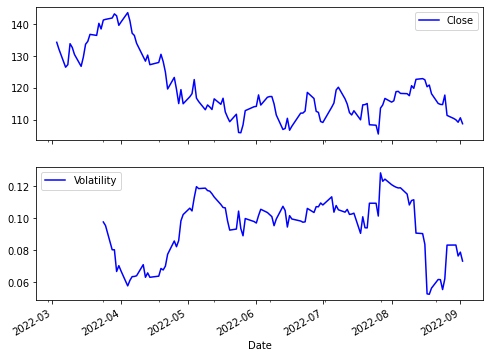

In [62]:
%matplotlib inline

goog[['Close', 'Volatility']].plot(subplots=True, 
                                   color='blue', 
                                   figsize=(8,6))